### What is Covered
- KNN Classification
- Find the best value of K, using K-Fold Cross validation
- Hyper parameter tuning with Grid Search

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Create x and y variables
x = dataset.drop('species', axis=1).to_numpy()
y = dataset['species'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

In [19]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
   
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()


 k-NN Learning Curve


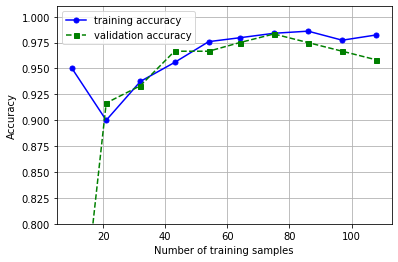

In [20]:
print('\n k-NN Learning Curve')
plot_learning_curves(pipe_knn)

In [23]:
#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn import metrics  

k_range = range(5, 10)
k_scores = []

for k in k_range:
    knn_org = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, y_train, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsClassifier(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, y_train)

#Prediction
y_pred_org = classifier_org.predict(x_test2)
  

from sklearn.metrics import classification_report, confusion_matrix  
y_pred_org = classifier_org.predict(x_test2)
target_names=['setosa','versicolor','virginica']
print('\nEstimator: k-NN')
print('\nn_neighbors:',str(best_k))
print('\n', confusion_matrix(y_test,y_pred_org))  
print(classification_report(y_test,y_pred_org,target_names=target_names))    


Estimator: k-NN

n_neighbors: 7

 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [31]:
#Gridsearch

from sklearn.model_selection import GridSearchCV

#k-NN Regression Model
knnclass = KNeighborsClassifier()
k_range = range(5, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnclass, param_grid, cv=10, verbose=0,
                         scoring='accuracy')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Model') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     y_pred_org = classifier_org.predict(x_test2)
     #target_names=['setosa','versicolor','virginica']
     print('\nEstimator: k-NN')
     print('\nn_neighbors:',str(best_k))
     print('\n', confusion_matrix(y_test,y_pred_org))  
     print(classification_report(y_test,y_pred_org))    

Optimized Model

Estimator: k-NN Regression Model

Best params: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

Estimator: k-NN

n_neighbors: 7

 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

